**IMPORT**

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns  # visualization tool
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

**READ DATA DAN VISUALISASI 1**

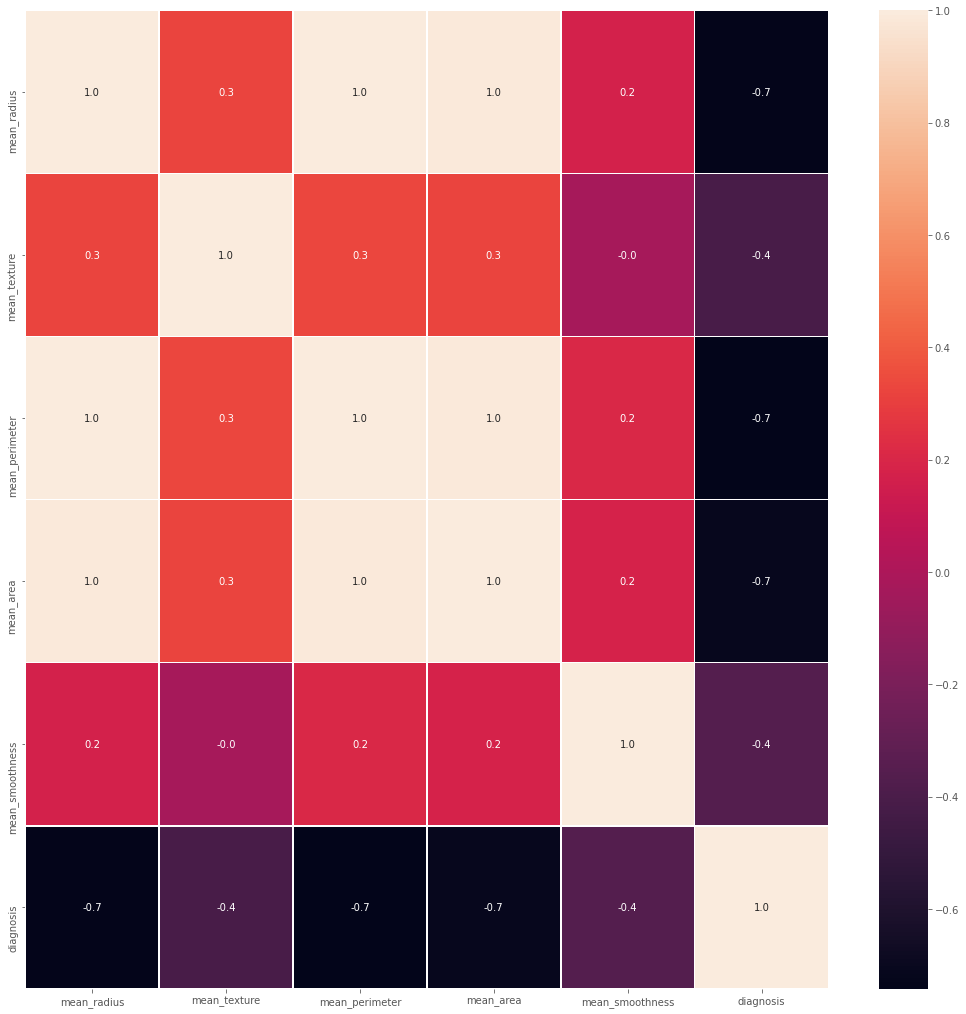

In [36]:
warnings.filterwarnings('ignore') #ignore warning messages 


plt.style.use('ggplot')
df = pd.read_csv('../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop(['diagnosis'],axis=1),df['diagnosis'], test_size=0.10, random_state=101)


# Visualization
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**VISUALISASI 2**

In [37]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)


**ALGORITMA DECISION TREE**

In [38]:
# Decision Tree Classification
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print("Confussion Matrix : ",confusion_matrix(y_test,dt_pred))
print ("")
print(classification_report(y_test,dt_pred))
print ("")
print (dt_model)


Confussion Matrix :  [[19  3]
 [ 3 32]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.91      0.91      0.91        35

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


**ALGORITMA RANDOM FOREST**

In [39]:
# Random Forest Classification
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
rf_pre=rf.predict(X_test)
print("Confussion Matrix : ", confusion_matrix(y_test,rf_pre))
print("")
print(classification_report(y_test,rf_pre))

Confussion Matrix :  [[20  2]
 [ 0 35]]

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.95      1.00      0.97        35

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



In [40]:
joblib_file = "joblib_RL_Model.pkl"  
joblib.dump(dt_model, joblib_file)

['joblib_RL_Model.pkl']